In [32]:
from captcha.image import ImageCaptcha, random_color, table, DEFAULT_FONTS
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from PIL.ImageFont import truetype
from PIL.ImageDraw import Draw
import cv2
import numpy as np
import random
import os
import IPython

In [33]:
fonts_path = '/System/Library/Fonts/Supplemental'


fonts2 = [os.path.join(fonts_path, f) for f in os.listdir(fonts_path) if f.endswith('.ttf')]

5WCR


/var/folders/fh/yq61fqcs3q9_0k81sxnf4ff40000gn/T/ipykernel_81409/3557002047.py:52: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(text)


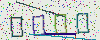

QR0i


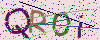

XpvM


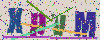

hLb0


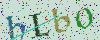

ukp5


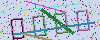

24rb


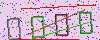

Yhji


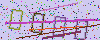

2g4T


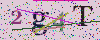

xlY3


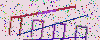

QkIn


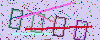

In [34]:
import string
import random
from PIL import Image, ImageDraw, ImageFont


class Captcha:
    def __init__(self, captcha_size=(150, 50),
                 font_size=40, font_style=None, text_number=6,
                 line_number=6, background_color=(255, 255, 255),
                 sources=None):

        self.captcha_width = captcha_size[0]
        self.captcha_height = captcha_size[-1]
        self.font_size = font_size
        self.text_number = text_number
        self.line_number = line_number
        self.background_color = background_color
        if font_style:
            self.font_style = font_style
        else:
            self.font_style = 'simkai.ttf'
        if sources:
            self.sources = sources
        else:
            self.sources = string.ascii_letters + string.digits

    def _get_text(self):
        text = random.sample(self.sources, k=self.text_number)
        return ''.join(text)

    def _font_color(self):
        return random.randint(0, 150), random.randint(0, 150), random.randint(0, 150)

    def _other_color(self):
        return random.randint(0, 250), random.randint(0, 250), random.randint(0, 250)

    def _draw_line(self, draw):
        begin = (random.randint(0, self.captcha_width // 2), random.randint(0, self.captcha_height))
        end = (random.randint(self.captcha_width // 2, self.captcha_width),
               random.randint(0, self.captcha_height))
        draw.line([begin, end], fill=self._other_color(), width=random.randint(1, 3))

    def _draw_point(self, draw, point_chance):
        for w in range(self.captcha_width):
            for h in range(self.captcha_height):
                tmp = random.randint(0, 100)
                if tmp < point_chance:
                    draw.point((w, h), fill=self._other_color())

    def _draw_text(self, draw, text, font, spacing=20):

        text_width, text_height = font.getsize(text)

        char_length = int(text_width / self.text_number)
        total_spacing = (self.text_number - 1) * spacing

        true_width = total_spacing + text_width
        true_height = text_height


        start_width = int((self.captcha_width - true_width) / 2)
        start_height = int((self.captcha_height - true_height) / 2)
        for value in text:
            position = start_width, start_height
            draw.text(position, value, font=font, fill=self._font_color())
            start_width = start_width + char_length + spacing

    def code(self):
        captcha = Image.new('RGB', (self.captcha_width, self.captcha_height), self.background_color)
        font = ImageFont.truetype(self.font_style, self.font_size)
        draw = ImageDraw.Draw(captcha)
        text = self._get_text()

        self._draw_text(draw, text, font, spacing=5)
        captcha = captcha.rotate(random.randint(-10, 10), fillcolor=self.background_color)
        draw = ImageDraw.Draw(captcha)

        for _ in range(self.line_number):
            self._draw_line(draw)

        self._draw_point(draw, 10)
        return captcha, text
    
class CaptchaGenerator2:
    def __init__(self, fonts):
        font_dir = '/usr/share/fonts/truetype/msttcorefonts/'
        
        self.vocab = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
        self.fonts = fonts2

    
        
    def generate(self):
        captcha = Captcha(
            captcha_size=(100, 40),
            font_style=random.choice(self.fonts), 
            font_size=random.randint(28, 32), 
            sources=self.vocab, 
            text_number=4,
            line_number=random.randrange(0, 7),
            background_color=(random.randrange(200, 255), random.randrange(200, 255), random.randrange(200, 255))
        )
        
        img, code = captcha.code()
        
        return np.array(img), code
    
    

fonts2.extend(DEFAULT_FONTS)
    
cg2 = CaptchaGenerator2(fonts=fonts2)
for i in range(10):
    im, txt = cg2.generate()
    print(txt)
    IPython.display.display(Image.fromarray(im))

In [35]:
#export this code to postgres database with the picture and the text

from decouple import config
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import cv2

password = config('PASSWORD')

# Connect to Postgres database
engine = create_engine('postgresql://postgres:' + password + '@localhost:5433/captchadb')

# Create a table in the database
engine.execute('CREATE TABLE captcha (id SERIAL PRIMARY KEY, image BYTEA, text VARCHAR(4))')

# Insert the image and the text into the database
for i in range(10000):
    im, txt = cg2.generate()
    im = cv2.imencode('.jpg', im)[1].tostring()
    engine.execute('INSERT INTO captcha (image, text) VALUES (%s, %s)', (im, txt))

# Read the image and the text from the database
df = pd.read_sql_query('SELECT * FROM captcha', engine)

# Show the image and the text
for i in range(10):
    im = cv2.imdecode(np.frombuffer(df['image'][i], np.uint8), cv2.IMREAD_COLOR)
    txt = df['text'][i]
    print(txt)
    IPython.display.display(Image.fromarray(im))
    

ProgrammingError: (psycopg2.errors.DuplicateTable) relation "captcha" already exists

[SQL: CREATE TABLE captcha (id SERIAL PRIMARY KEY, image BYTEA, text VARCHAR(4))]
(Background on this error at: https://sqlalche.me/e/14/f405)

/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf
iOFf


/var/folders/fh/yq61fqcs3q9_0k81sxnf4ff40000gn/T/ipykernel_81409/3557002047.py:52: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(text)


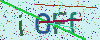

/System/Library/Fonts/Supplemental/Webdings.ttf
mxh0


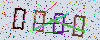

/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf
ACaB


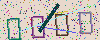

/System/Library/Fonts/Supplemental/Zapfino.ttf
aP8D


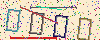

/System/Library/Fonts/Supplemental/NotoSansCaucasianAlbanian-Regular.ttf
bsa0


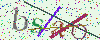

/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf
9keV


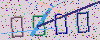

/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf
g0tZ


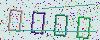

/System/Library/Fonts/Supplemental/Georgia.ttf
wLvr


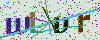

/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf
DqyS


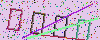

/System/Library/Fonts/Supplemental/NotoSansMultani-Regular.ttf
Qpch


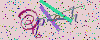

/System/Library/Fonts/Supplemental/NotoSansHatran-Regular.ttf
pejO


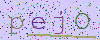

/System/Library/Fonts/Supplemental/Verdana Bold.ttf
jTCK


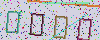

/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf
sSpX


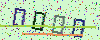

/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf
STBy


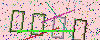

/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf
bQko


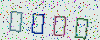

/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf
3uI2


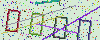

/System/Library/Fonts/Supplemental/Silom.ttf
YIW0


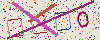

/System/Library/Fonts/Supplemental/NotoSansBhaiksuki-Regular.ttf
7tD8


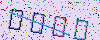

/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf
mvoT


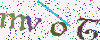

/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf
B52m


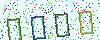

/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.ttf
JiAz


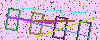

/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf
IEBq


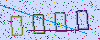

/System/Library/Fonts/Supplemental/Verdana Italic.ttf
IMFb


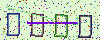

/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf
UNaQ


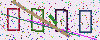

/System/Library/Fonts/Supplemental/NotoSansOsage-Regular.ttf
YNlI


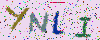

/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf
Q9ez


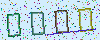

/System/Library/Fonts/Supplemental/NotoSansPahawhHmong-Regular.ttf
2NFz


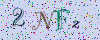

/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf
HWd4


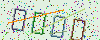

/System/Library/Fonts/Supplemental/NotoSansMro-Regular.ttf
1N62


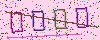

/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf
XqEC


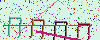

/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf
twN3


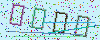

/System/Library/Fonts/Supplemental/NotoSansMiao-Regular.ttf
fF1u


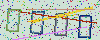

/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf
NYLV


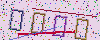

/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf
2JP5


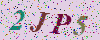

/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf
LwQ2


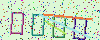

/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf
iWQp


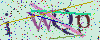

/System/Library/Fonts/Supplemental/AppleGothic.ttf
69yB


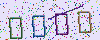

/System/Library/Fonts/Supplemental/STIXTwoText-Italic.ttf
0yiB


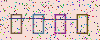

/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf
0Jd6


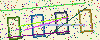

/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf
K6zl


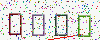

/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf
zUX3


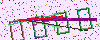

/System/Library/Fonts/Supplemental/NotoSansNabataean-Regular.ttf
Zy5g


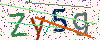

/System/Library/Fonts/Supplemental/NotoSerifNyiakengPuachueHmong-Regular.ttf
oaOg


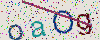

/System/Library/Fonts/Supplemental/Farisi.ttf
THFI


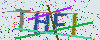

/System/Library/Fonts/Supplemental/Arial Bold.ttf
18Dz


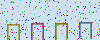

/System/Library/Fonts/Supplemental/Trebuchet MS.ttf
X2V4


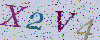

/System/Library/Fonts/Supplemental/Mishafi.ttf
m6MW


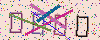

/System/Library/Fonts/Supplemental/NotoSansDuployan-Regular.ttf
Iupe


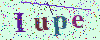

/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf
dEhw


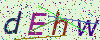

/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf
RL3f


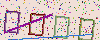

/System/Library/Fonts/Supplemental/Trattatello.ttf
zlXY


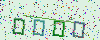

/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf
uopI


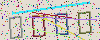

/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf
U1Lw


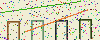

/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf
vCsG


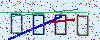

/System/Library/Fonts/Supplemental/BigCaslon.ttf
6dc7


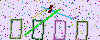

/System/Library/Fonts/Supplemental/NotoSansWarangCiti-Regular.ttf
BrA8


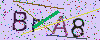

/System/Library/Fonts/Supplemental/Courier New Bold.ttf
a18X


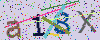

/System/Library/Fonts/Supplemental/NISC18030.ttf
KzIv


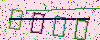

/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf
uP0X


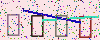

/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf
ODUR


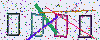

/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf
KqBv


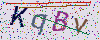

/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf
BEZJ


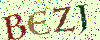

/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf
JQRk


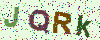

/System/Library/Fonts/Supplemental/Luminari.ttf
xP8R


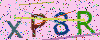

/System/Library/Fonts/Supplemental/Times New Roman.ttf
1wP4


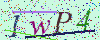

/System/Library/Fonts/Supplemental/Brush Script.ttf
VDbC


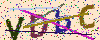

/System/Library/Fonts/Supplemental/Georgia Italic.ttf
Afk8


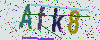

/System/Library/Fonts/Supplemental/Courier New Italic.ttf
n5Lh


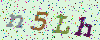

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
XyEk


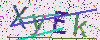

/System/Library/Fonts/Supplemental/Chalkduster.ttf
cFLv


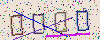

/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf
Zu7r


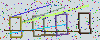

/System/Library/Fonts/Supplemental/Apple Chancery.ttf
cdPy


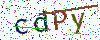

/System/Library/Fonts/Supplemental/AppleMyungjo.ttf
Jy95


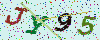

/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf
gEuQ


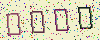

/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf
Bg2s


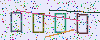

/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf
ArqS


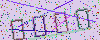

/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf
AW74


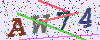

/System/Library/Fonts/Supplemental/NotoSansMeroitic-Regular.ttf
uG7R


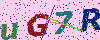

/System/Library/Fonts/Supplemental/NotoSansPalmyrene-Regular.ttf
TfMc


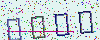

/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf
84xn


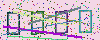

/System/Library/Fonts/Supplemental/Arial Narrow.ttf
T3O9


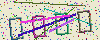

/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf
puIX


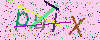

/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf
Xu0r


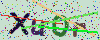

/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf
6oJ3


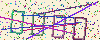

/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf
SrMA


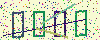

/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf
2t9B


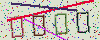

/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf
mFek


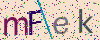

/System/Library/Fonts/Supplemental/Courier New.ttf
Va5S


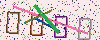

/System/Library/Fonts/Supplemental/Wingdings 3.ttf
2klu


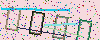

/System/Library/Fonts/Supplemental/NotoSansMahajani-Regular.ttf
L5PN


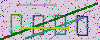

/System/Library/Fonts/Supplemental/Wingdings 2.ttf
2wMJ


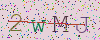

/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf
EaOR


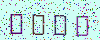

/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf
kaxq


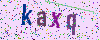

/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf
kjaq


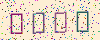

/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf
hoON


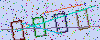

/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf
W1cd


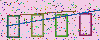

/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf
0rAW


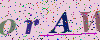

/System/Library/Fonts/Supplemental/STIXTwoText.ttf
wETQ


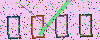

/System/Library/Fonts/Supplemental/Skia.ttf
WhTQ


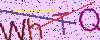

/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf
T0eM


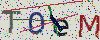

/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf
AqZd


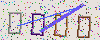

/System/Library/Fonts/Supplemental/Impact.ttf
xgkL


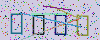

/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf
TBk1


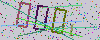

/System/Library/Fonts/Supplemental/Kokonor.ttf
L7lK


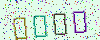

/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf
h8ik


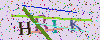

/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf
BAlZ


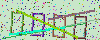

/System/Library/Fonts/Supplemental/NotoSansTakri-Regular.ttf
OWCx


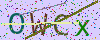

/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf
uaFh


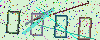

/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf
8gm3


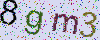

/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf
R9LX


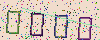

/System/Library/Fonts/Supplemental/PartyLET-plain.ttf
YQK7


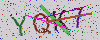

/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf
rEQ7


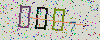

/System/Library/Fonts/Supplemental/Tahoma Bold.ttf
E57Y


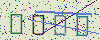

/System/Library/Fonts/Supplemental/Arial.ttf
urmw


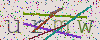

/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf
4U0D


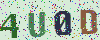

/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf
ju4F


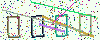

/System/Library/Fonts/Supplemental/Ayuthaya.ttf
RV5p


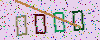

/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf
XEKh


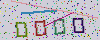

/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf
OFoV


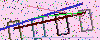

/System/Library/Fonts/Supplemental/NotoSansKhojki-Regular.ttf
Mqav


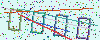

/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf
8nZR


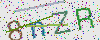

/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf
2qRx


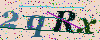

/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf
bBdO


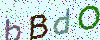

/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf
O9js


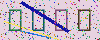

/System/Library/Fonts/Supplemental/Arial Black.ttf
KXt0


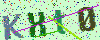

/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf
YI8r


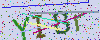

/System/Library/Fonts/Supplemental/Comic Sans MS.ttf
gewi


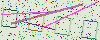

/System/Library/Fonts/Supplemental/NotoSansKhudawadi-Regular.ttf
7nIC


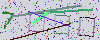

/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf
RtSY


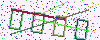

/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf
JFig


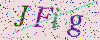

/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf
8R7G


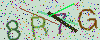

/System/Library/Fonts/Supplemental/Wingdings.ttf
OysE


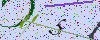

/System/Library/Fonts/Supplemental/NotoSansNewa-Regular.ttf
PTDU


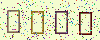

/System/Library/Fonts/Supplemental/Sathu.ttf
lSxP


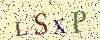

/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf
8tgy


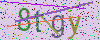

/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf
7pXx


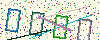

/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf
g5RI


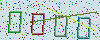

/System/Library/Fonts/Supplemental/Tahoma.ttf
d35W


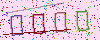

/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf
mNUz


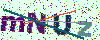

/System/Library/Fonts/Supplemental/Georgia Bold.ttf
tqzo


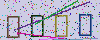

/System/Library/Fonts/Supplemental/NotoSansLinearA-Regular.ttf
AxC1


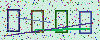

/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf
AOrd


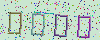

/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf
WDly


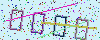

/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf
Jie0


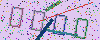

/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf
g8fb


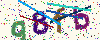

/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf
EHba


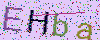

/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf
xVEG


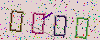

/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf
2MiL


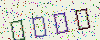

/System/Library/Fonts/Supplemental/NotoSansWancho-Regular.ttf
vIod


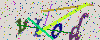

/System/Library/Fonts/Supplemental/Krungthep.ttf
b3wh


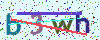

/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf
ih5g


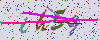

/System/Library/Fonts/Supplemental/NotoSansPauCinHau-Regular.ttf
YXjK


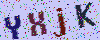

/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf
DN6R


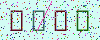

/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf
5SE6


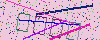

/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf
anBX


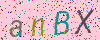

/System/Library/Fonts/Supplemental/Gurmukhi.ttf
Twr0


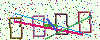

/System/Library/Fonts/Supplemental/Andale Mono.ttf
4fsv


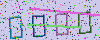

/System/Library/Fonts/Supplemental/Mishafi Gold.ttf
QF8P


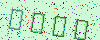

/System/Library/Fonts/Supplemental/Herculanum.ttf
R6s0


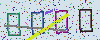

/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf
6GAX


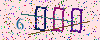

/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf
ZMjA


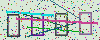

/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf
8j65


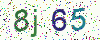

/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf
bICR


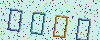

/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf
H9wS


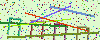

/System/Library/Fonts/Supplemental/Arial Italic.ttf
gyAz


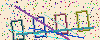

/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf
60Kf


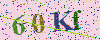

/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf
eaWY


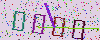

/System/Library/Fonts/Supplemental/Verdana.ttf
D82V


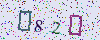

/System/Library/Fonts/Supplemental/NotoSansOldPermic-Regular.ttf
vIGC


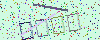

/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf
u9eD


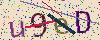

/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf
9skc


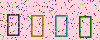

/System/Library/Fonts/Supplemental/NotoSansOldNorthArabian-Regular.ttf
ofwk


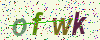

/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf
mQNS


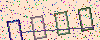

/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf
ZvI8


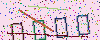

/Users/nilufarkhaydarova/opt/anaconda3/envs/work/lib/python3.9/site-packages/captcha/data/DroidSansMono.ttf
CaYG


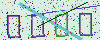

In [36]:
for f in fonts2:
    cg = CaptchaGenerator2(fonts=[f])
    im, txt = cg.generate()
    print(f)
    print(txt)
    IPython.display.display(Image.fromarray(im))